Analysis of IMDB data as a data scientist at SussexBudgetProductions



import all the important python libraries, we also can import them later on.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
#loaded data set into a data frame using pandas
imdb_movies=pd.read_csv(r'C:\Users\Pramod\Downloads\movie_metadata.csv')


In [101]:
imdb_movies.head()
#sample of data set

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [102]:
#to check the dimension of my data set
imdb_movies.shape

(5043, 28)

The data set has 5043 rows and 28 columns.

### Exploratory Data Analysis
Various steps for data analysis:

Identification data types, Identification missing values, Analysing the basic data sets, Variable transformations, Missing value treatment, Dimensionality Reduction, Graphical representation of data Correlation Analysis.


I want to check it out more information about my data set,like which type of data my columns are having, also find it out whether my data set have a null value or not.

In [103]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

I want to know more about my data set like mean, Median, Upper quartile, Lower quartile etc.

In [104]:
imdb_movies.describe()
#describe funtion is quite useful in pandas, it gives the different important statistical measurements.

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [105]:
#Check how many values are null in the data set
imdb_movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

 there are many null values but i am more interested towards checking and finding the null values in gross and budget column.

In [106]:
imdb_movies.isnull().sum().sort_values(ascending=False)
#Sorted null values in ascending order

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

In [107]:
imdb_movies=imdb_movies.drop_duplicates()
imdb_movies


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


There are many duplicate values in each row, I want to remove the duplicate values which are in particularly in gross and budget data.

In [108]:
imdb_movies.isnull().sum().sort_values(ascending=False)/len(imdb_movies)*100
# Checked null values percentage wise

gross                        17.486995
budget                        9.743898
aspect_ratio                  6.542617
content_rating                6.022409
plot_keywords                 3.041216
title_year                    2.140856
director_name                 2.060824
director_facebook_likes       2.060824
num_critic_for_reviews        0.980392
actor_3_name                  0.460184
actor_3_facebook_likes        0.460184
num_user_for_reviews          0.420168
color                         0.380152
duration                      0.300120
facenumber_in_poster          0.260104
actor_2_name                  0.260104
actor_2_facebook_likes        0.260104
language                      0.240096
actor_1_name                  0.140056
actor_1_facebook_likes        0.140056
country                       0.100040
movie_facebook_likes          0.000000
genres                        0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_imdb_link          

In [109]:
imdb_movies=imdb_movies[imdb_movies['gross'].notnull()]
imdb_movies=imdb_movies[imdb_movies['budget'].notnull()]
imdb_movies.isnull().sum().sort_values(ascending=False)/len(imdb_movies)*100

aspect_ratio                 1.918590
content_rating               1.322271
plot_keywords                0.803733
actor_3_facebook_likes       0.259269
actor_3_name                 0.259269
facenumber_in_poster         0.155561
actor_2_name                 0.129634
actor_2_facebook_likes       0.129634
actor_1_facebook_likes       0.077781
actor_1_name                 0.077781
language                     0.077781
color                        0.051854
duration                     0.025927
num_critic_for_reviews       0.025927
genres                       0.000000
director_facebook_likes      0.000000
director_name                0.000000
gross                        0.000000
movie_facebook_likes         0.000000
movie_title                  0.000000
num_voted_users              0.000000
movie_imdb_link              0.000000
num_user_for_reviews         0.000000
country                      0.000000
budget                       0.000000
title_year                   0.000000
imdb_score  

Now the duplicate values have been removed from both gross and budget column

In [118]:
imdb_movies.language.describe()

count        3857
unique         39
top       English
freq         3674
Name: language, dtype: object

Most of the movies are in English language now where there is any missing value in language column, I am replacing it with English.

In [119]:
imdb_movies.language=imdb_movies.language.fillna('english')
imdb_movies.isnull().sum().sort_values(ascending=False)/len(imdb_movies)*100
#chcek again if there is any null value in language

aspect_ratio                 1.918590
content_rating               1.322271
plot_keywords                0.803733
actor_3_name                 0.259269
actor_3_facebook_likes       0.259269
facenumber_in_poster         0.155561
actor_2_facebook_likes       0.129634
actor_2_name                 0.129634
actor_1_facebook_likes       0.077781
actor_1_name                 0.077781
color                        0.051854
num_critic_for_reviews       0.025927
duration                     0.025927
movie_imdb_link              0.000000
num_user_for_reviews         0.000000
director_name                0.000000
director_facebook_likes      0.000000
imdb_score                   0.000000
title_year                   0.000000
budget                       0.000000
gross                        0.000000
genres                       0.000000
country                      0.000000
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
movie_facebo

The budget of the movies is not in million, I want to change the gross and budget columns into million.

In [120]:
imdb_movies['gross']=imdb_movies['gross']/1000000
imdb_movies['budget']=imdb_movies['budget']/1000000

Overall aim of our analysis is to find the maximum profit respective to the given budget. Now, I am getting profit from gross and budget. Also, I have included profit column to my data frame

In [121]:
imdb_movies['profit']= imdb_movies['gross']-imdb_movies['budget']
#profit=gross-budget

In [122]:
#top10 movies according to profit
top10_movies=imdb_movies.sort_values(by='profit',ascending = False).head(10)
top10_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,0.000761,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,0.000237,2009.0,936.0,7.9,1.78,33000,0.000524
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,0.000652,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,0.000150,2015.0,2000.0,7.0,2.00,150000,0.000502
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,0.000659,Drama|Romance,...,English,USA,PG-13,0.000200,1997.0,14000.0,7.7,2.35,26000,0.000459
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,0.000461,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,0.000011,1977.0,1000.0,8.7,2.35,33000,0.000450
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,0.000435,Family|Sci-Fi,...,English,USA,PG,0.000010,1982.0,725.0,7.9,1.85,34000,0.000424
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,0.000623,Action|Adventure|Sci-Fi,...,English,USA,PG-13,0.000220,2012.0,21000.0,8.1,1.85,123000,0.000403
509,Color,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,0.000423,Adventure|Animation|Drama|Family|Musical,...,English,USA,G,0.000045,1994.0,886.0,8.5,1.66,17000,0.000378
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,0.000475,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,0.000115,1999.0,14000.0,6.5,2.35,13000,0.000360
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,0.000533,Action|Crime|Drama|Thriller,...,English,USA,PG-13,0.000185,2008.0,13000.0,9.0,2.35,37000,0.000348
439,Color,Gary Ross,673.0,142.0,378.0,575.0,Josh Hutcherson,34000.0,0.000408,Adventure|Drama|Sci-Fi|Thriller,...,English,USA,PG-13,0.000078,2012.0,14000.0,7.3,2.35,140000,0.000330


In [123]:
imdb_movies
#lets check the data set 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e-04,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,2.370000e-04,2009.0,936.0,7.9,1.78,33000,5.235058e-04
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e-04,Action|Adventure|Fantasy,...,English,USA,PG-13,3.000000e-04,2007.0,5000.0,7.1,2.35,0,9.404152e-06
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e-04,Action|Adventure|Thriller,...,English,UK,PG-13,2.450000e-04,2015.0,393.0,6.8,2.35,85000,-4.492583e-05
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e-04,Action|Thriller,...,English,USA,PG-13,2.500000e-04,2012.0,23000.0,8.5,2.35,164000,1.981306e-04
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,7.305868e-05,Action|Adventure|Sci-Fi,...,English,USA,PG-13,2.637000e-04,2012.0,632.0,6.6,2.35,24000,-1.906413e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,4.247600e-07,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7.000000e-09,2004.0,45.0,7.0,1.85,19000,4.177600e-07
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,7.007100e-08,Thriller,...,English,Philippines,Not Rated,7.000000e-09,2005.0,0.0,6.3,NaN,74,6.307100e-08
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.040920e-06,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7.000000e-09,1992.0,20.0,6.9,1.37,0,2.033920e-06
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e-09,Comedy|Drama,...,English,USA,Not Rated,9.000000e-09,2011.0,205.0,6.4,NaN,413,-4.416000e-09


Top 1o movies by profit.

In [126]:
top10_movies=imdb_movies.sort_values(by='profit',ascending = False).head(10)
top10_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,0.000761,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,0.000237,2009.0,936.0,7.9,1.78,33000,0.000524
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,0.000652,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,0.000150,2015.0,2000.0,7.0,2.00,150000,0.000502
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,0.000659,Drama|Romance,...,English,USA,PG-13,0.000200,1997.0,14000.0,7.7,2.35,26000,0.000459
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,0.000461,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,0.000011,1977.0,1000.0,8.7,2.35,33000,0.000450
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,0.000435,Family|Sci-Fi,...,English,USA,PG,0.000010,1982.0,725.0,7.9,1.85,34000,0.000424
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,0.000623,Action|Adventure|Sci-Fi,...,English,USA,PG-13,0.000220,2012.0,21000.0,8.1,1.85,123000,0.000403
509,Color,Roger Allers,186.0,73.0,28.0,847.0,Nathan Lane,2000.0,0.000423,Adventure|Animation|Drama|Family|Musical,...,English,USA,G,0.000045,1994.0,886.0,8.5,1.66,17000,0.000378
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,0.000475,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,0.000115,1999.0,14000.0,6.5,2.35,13000,0.000360
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,0.000533,Action|Crime|Drama|Thriller,...,English,USA,PG-13,0.000185,2008.0,13000.0,9.0,2.35,37000,0.000348
439,Color,Gary Ross,673.0,142.0,378.0,575.0,Josh Hutcherson,34000.0,0.000408,Adventure|Drama|Sci-Fi|Thriller,...,English,USA,PG-13,0.000078,2012.0,14000.0,7.3,2.35,140000,0.000330


Top 1o director.

In [127]:
top10_director=imdb_movies.groupby('director_name').profit.mean().sort_values(ascending=False).head(10)
top10_director

director_name
Tim Miller          0.000305
George Lucas        0.000277
Richard Marquand    0.000277
Kyle Balda          0.000262
Colin Trevorrow     0.000253
Chris Buck          0.000251
Yarrow Cheney       0.000249
Pierre Coffin       0.000237
Lee Unkrich         0.000215
Joss Whedon         0.000199
Name: profit, dtype: float64

In [128]:
top10_director=imdb_movies.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10)
top10_director
#top1o director by highest imdb_score

director_name
Charles Chaplin      8.600000
Tony Kaye            8.600000
Ron Fricke           8.500000
Damien Chazelle      8.500000
Majid Majidi         8.500000
Alfred Hitchcock     8.500000
Sergio Leone         8.433333
Christopher Nolan    8.425000
Asghar Farhadi       8.400000
Richard Marquand     8.400000
Name: imdb_score, dtype: float64

In [129]:
top10_gernes_movies=imdb_movies.groupby('genres').gross.mean().sort_values(ascending=False).head(10)
top10_gernes_movies

genres
Family|Sci-Fi                                      0.000435
Adventure|Animation|Drama|Family|Musical           0.000423
Adventure|Animation|Comedy|Drama|Family|Fantasy    0.000356
Action|Biography|Drama|History|Thriller|War        0.000350
Action|Adventure|Fantasy|Sci-Fi                    0.000297
Adventure|Drama|Fantasy|Romance                    0.000296
Action|Adventure|Fantasy|Romance                   0.000289
Adventure|Sci-Fi                                   0.000282
Adventure|Family|Fantasy|Mystery                   0.000279
Action|Adventure|Animation|Family                  0.000261
Name: gross, dtype: float64

Text(0, 0.5, 'Title Count')

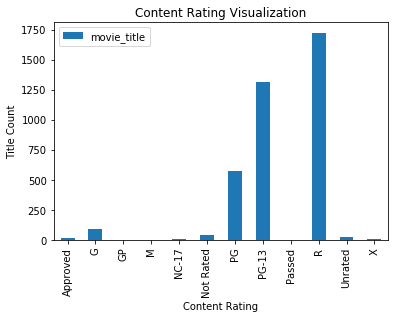

In [130]:
imdb_movies[['content_rating','movie_title']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

Most of the movies are of R rating.

I am more interested toward finding the popular genres. Firstly, I wanted to split the various genres through split function. Then will plot them with budget to find the most popular genre among them. 

In [74]:
genres = (imdb_movies.genres.str.split('|', expand=True)
            .stack()
            .to_frame(name='genre'))


genres.index = genres.index.droplevel(1)
#separating each genre through the pipe slicing

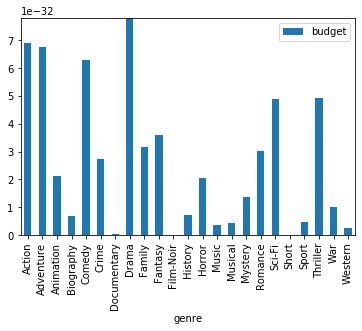

In [73]:
(genres.join(imdb_movies['budget'])
       .groupby('genre')
       .sum()
       .plot(kind='bar'))

The duration of most of the movies are in between 90-120. 

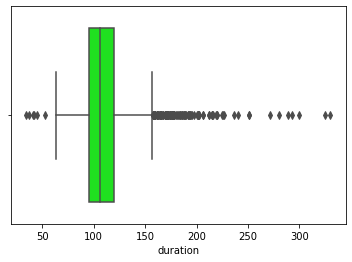

In [76]:
sns.boxplot(x=imdb_movies['duration'], color='lime', data=imdb_movies)
plt.xlabel('duration', fontsize=10)
plt.show()

I want to find the relation between the variable. I will use the correlation to find the relation among them.

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.238323,0.473969,0.599645,-0.034459,0.572541,0.106877,0.392517,0.342093,0.701906,0.039550
duration,0.238323,1.000000,0.249879,0.343534,0.033384,0.356670,0.068946,-0.129491,0.359345,0.219550,0.008458
gross,0.473969,0.249879,1.000000,0.629347,-0.033026,0.553589,0.101033,0.044862,0.212234,0.367425,0.205884
num_voted_users,0.599645,0.343534,0.629347,1.000000,-0.034888,0.782798,0.068307,0.016726,0.473321,0.519948,0.124928
facenumber_in_poster,-0.034459,0.033384,-0.033026,-0.034888,1.000000,-0.079670,-0.022325,0.068732,-0.069763,0.013245,0.011895
num_user_for_reviews,0.572541,0.356670,0.553589,0.782798,-0.079670,1.000000,0.073241,0.012605,0.320049,0.375155,0.096949
budget,0.106877,0.068946,0.101033,0.068307,-0.022325,0.073241,1.000000,0.044245,0.029407,0.053296,-0.952768
title_year,0.392517,-0.129491,0.044862,0.016726,0.068732,0.012605,0.044245,1.000000,-0.127715,0.293981,-0.029825
imdb_score,0.342093,0.359345,0.212234,0.473321,-0.069763,0.320049,0.029407,-0.127715,1.000000,0.280089,0.035862
movie_facebook_likes,0.701906,0.219550,0.367425,0.519948,0.013245,0.375155,0.053296,0.293981,0.280089,1.000000,0.059739


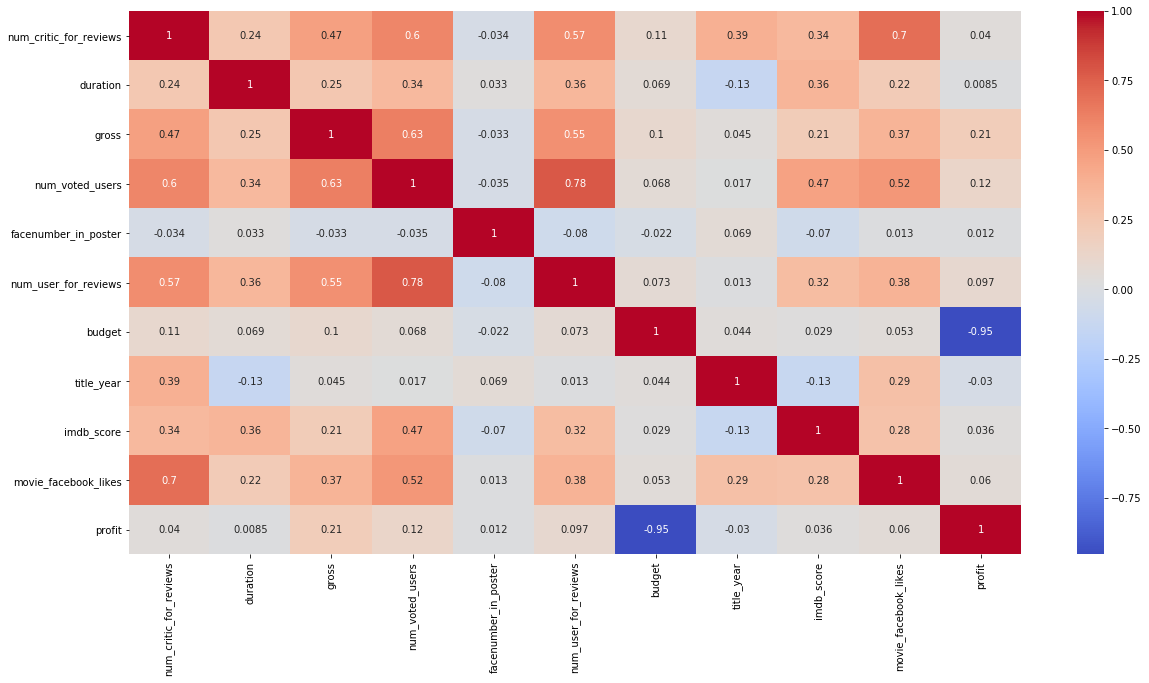

In [77]:
plt.figure(figsize=(20,10))
c=imdb_movies.corr()
sns.heatmap(c, cmap='coolwarm', annot=True)
c

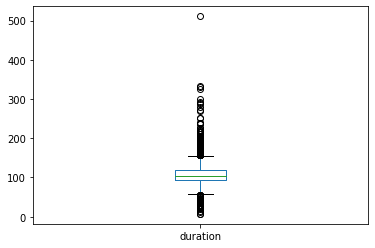

In [85]:
imdb_movies.duration.plot(kind='box')
#the mean lies in between 90-120
#box plot of duration 

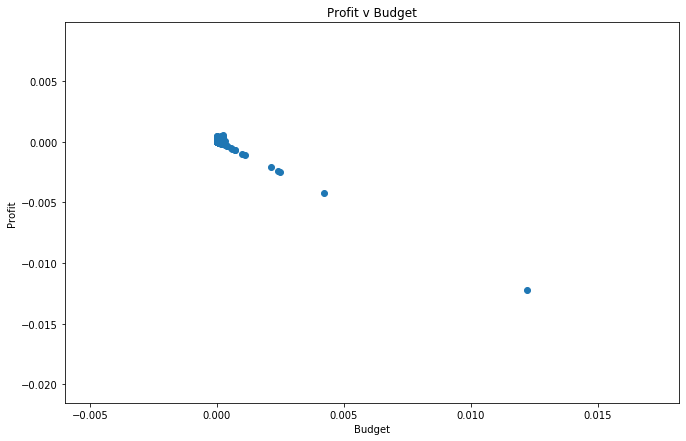

In [131]:
plt.figure(figsize=[11,7])
plt.scatter(imdb_movies.budget, imdb_movies.profit)
plt.title("Profit v Budget")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.show()

Hypothesis Testing

 

Null Hypothesis: If there are more number of users review to a film, then profit earn by the movie will be higher.

Alternate Hypothesis:Profit doesn’t only depend upon the number of users review for a movie and both are uncorrelated.

I am splitting my data sets into train and test. Further, I will take a sample size 10 to test my variables.

In [148]:
#spliting my data into dev and test set
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(imdb_movies, test_size=0.5, random_state=50)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1928
No. of testing examples: 1929


In [150]:
#I am taking sample size 10 in each dev and test set
training_data=training_data.head(10)
testing_data=testing_data.head(10)

EDA on training data

In [158]:
#the Pearson's Correlation test
from scipy.stats import pearsonr
x = training_data['imdb_score']
y = training_data['profit']
stat, p = pearsonr(x, y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.205, p=0.570
Probably independent


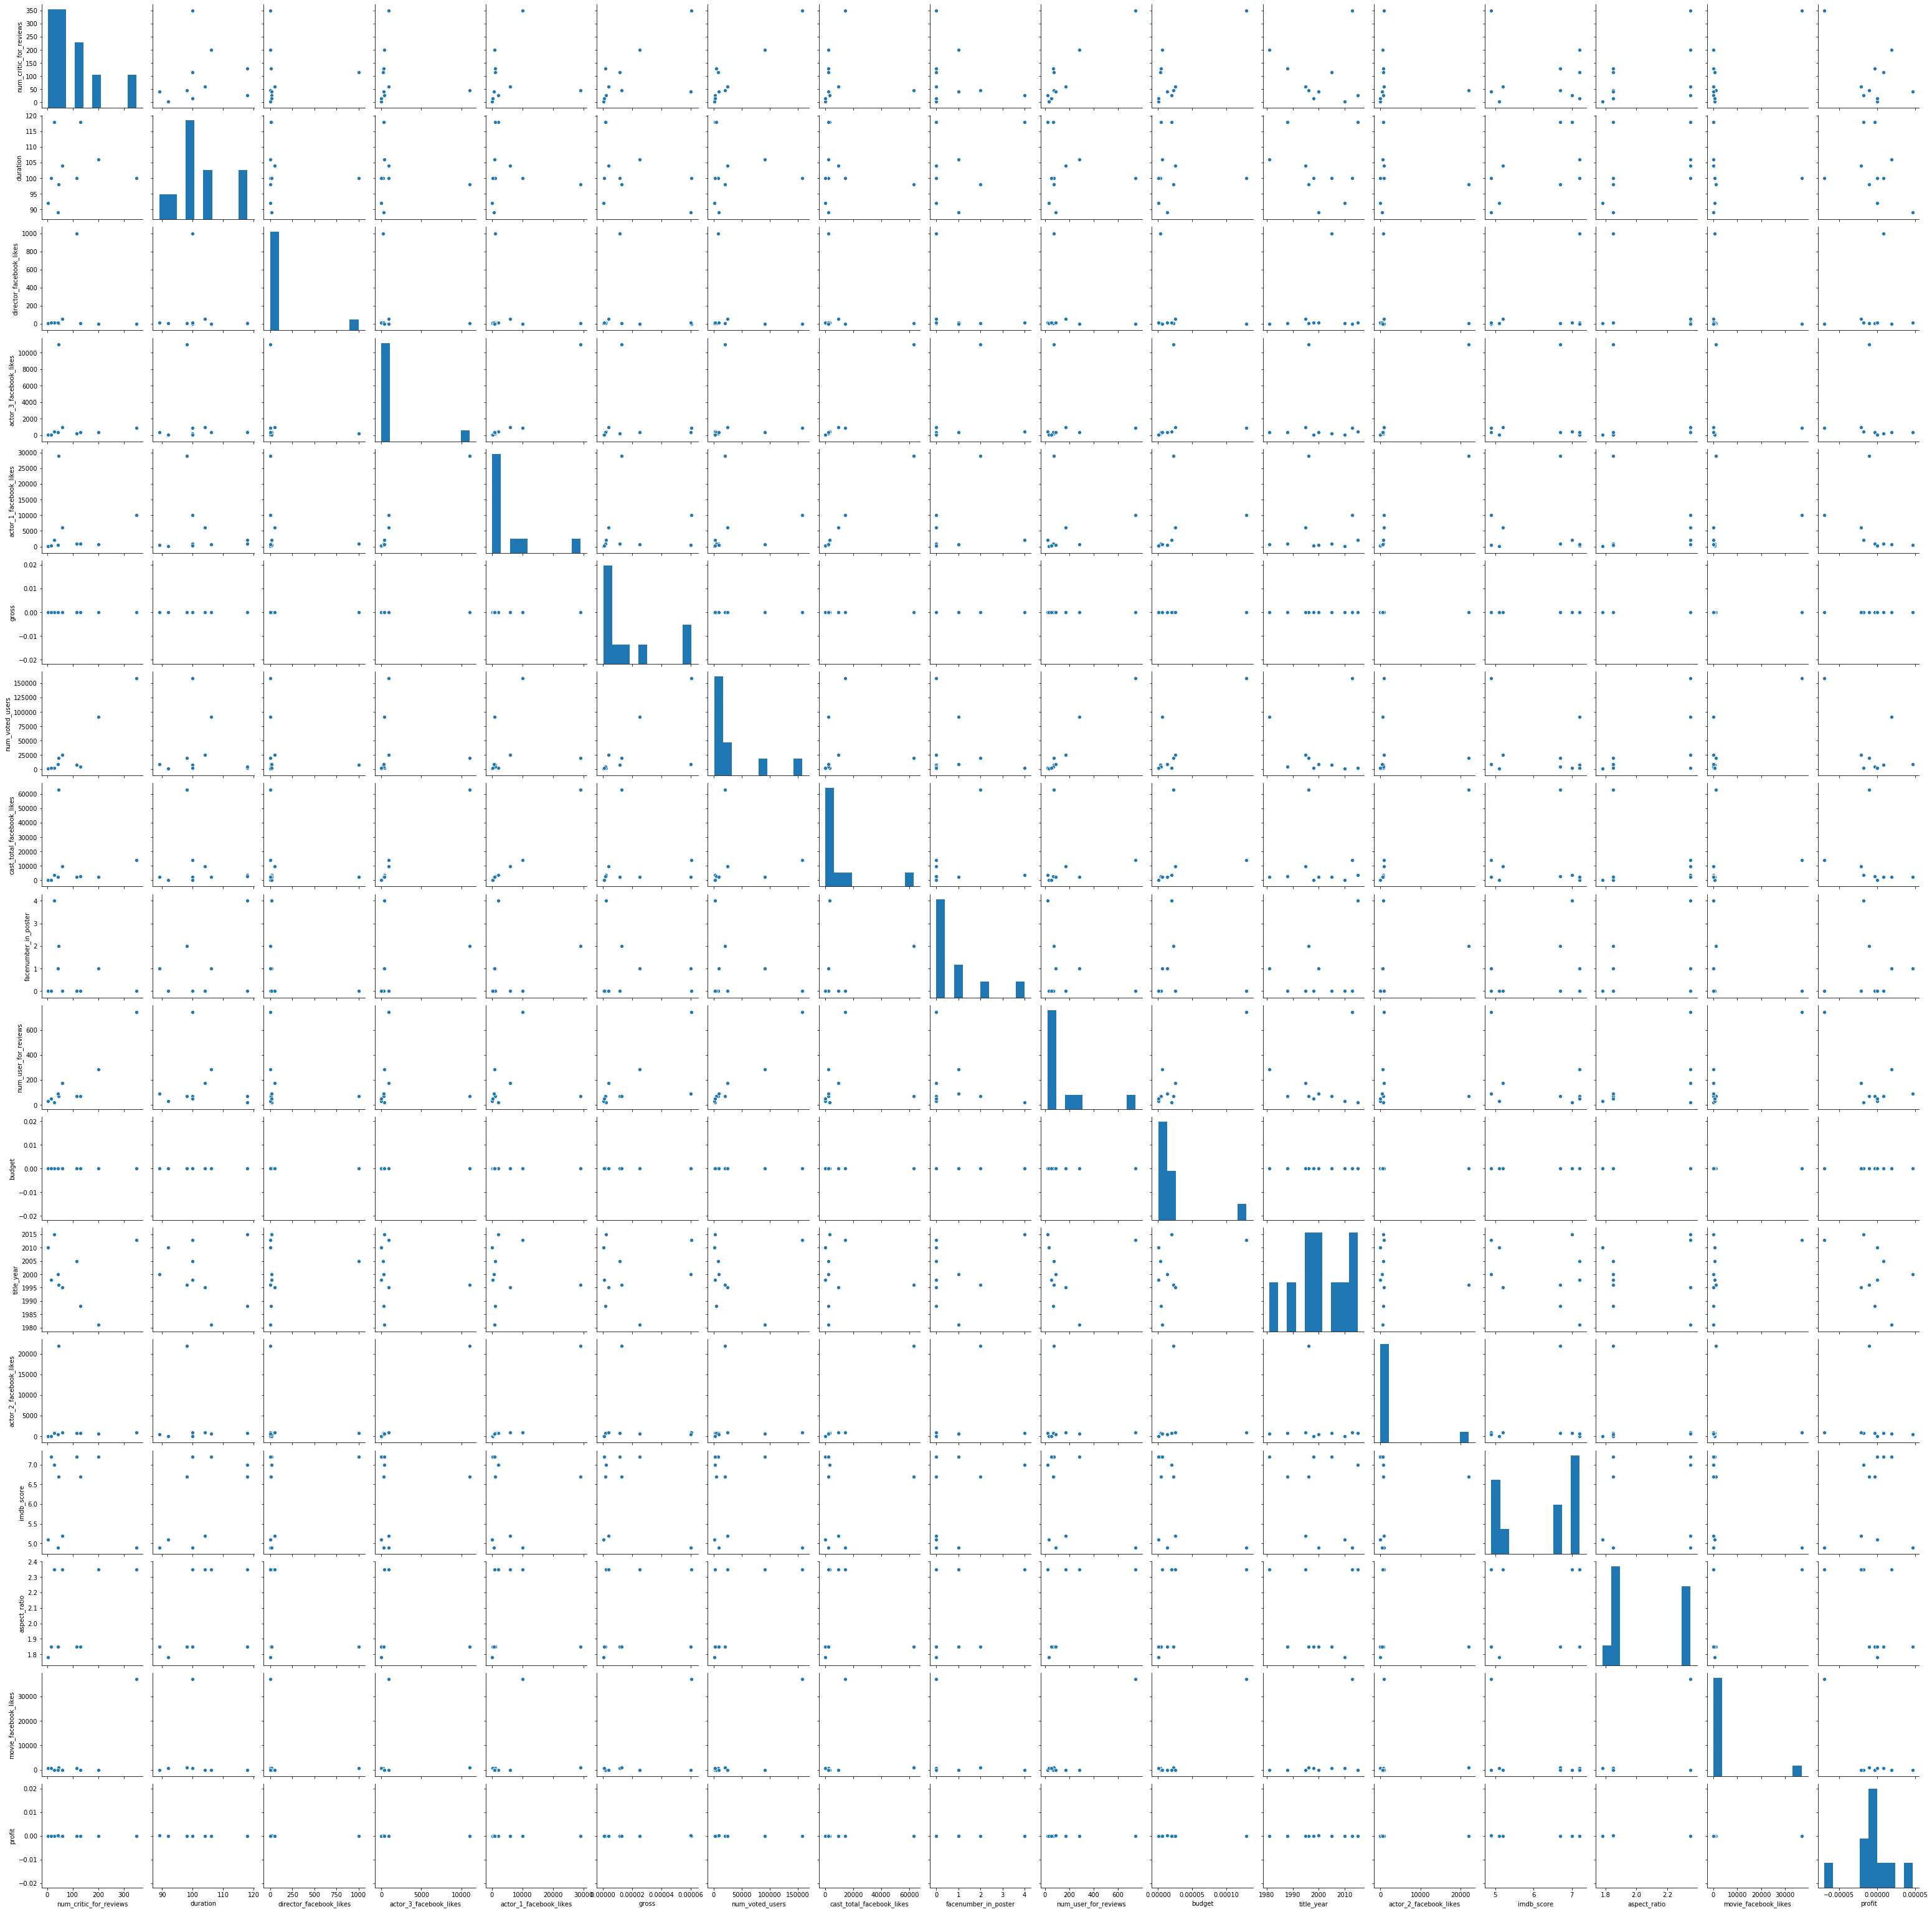

In [153]:
sns.pairplot(training_data)
#correlation analysis on training data

From the sample of training data, it is clearly visible that the profit does not depending much on the number of reviews. Even, I am getting the same profit with a smaller number of reviews.

In [159]:
# t test with test data
from scipy import stats
stats.ttest_ind(testing_data['profit'],testing_data['num_user_for_reviews'])
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Probably independent


Since the value of p is greater than 0.05, the null hypothesis is rejected and I have accepted that number of reviews from the users does not depend upon the profit.

Recommendation:

From the hypothesis testing it is evident that profit solely does not depend upon one variable. As a data scientist I will recommend the following recommendation for better profit.

Duration of movie should be in between 90 to 120. The mean duration lies on that range hence we should pick a movie for duration about 100. 

The movie should be in colour one rather than black and white one. Now a day, most of the movies are made on colourful mode so will prefer color. 

The content rating of movie should in between R or PG-13.

The movie should be in English.
 
The imdb score does not matter much to the profit of movie. There are many movies, which has low imdb score but they have earned more profit. Conversely, there are few movies, who has average imdb score but their budget was quite low and are profitable. Also, the number of user review for imdb score were not uniformly distributed.

Genre is consisted of one genre to three genre. the most of the popular genre among the audience was drama, action, adventure, comedy. Also, the top grossing genres were sci-fi, family, drama, action, adventure, comedy. Action, drama and mystery were the top-rated movie. However, horror and sci-fi were rated below average by the people. Also, the number of user review for imdb score were not uniformly distributed.

People who have watched and enjoyed the movie, have rated them as well. So, the number of critics review also suggested that the highest rated movies has earned much as well.

Director who has earned a good profit also has got good Facebook likes. We should consider director Facebook like as well.


In [164]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath="DSRM_REPORT1.ipynb"
question_count=0

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 723
